# Librerías necesarias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from scipy.special import entr
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Importación de datos

In [ ]:
#Por favor cambiar esta ruta por aquella en la que se encuentre almacenado el archivo de extensión .csv
train_data = pd.read_csv('C:/Users/juanj/Universidad de Antioquia/Monografia[] - General/Predicción de Diabetes Nov 2022/train_data.csv', sep=',')

In [ ]:
train_data.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


Nuestra variable de respuesta es la columna diabetes. En esta, el 0 representa que un paciente NO padece diabetes, y el 1 representa que un paciente SÍ padece diabetes.

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80692 entries, 0 to 80691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   80692 non-null  float64
 1   Sex                   80692 non-null  float64
 2   HighChol              80692 non-null  float64
 3   CholCheck             80692 non-null  float64
 4   BMI                   80692 non-null  float64
 5   Smoker                80692 non-null  float64
 6   HeartDiseaseorAttack  80692 non-null  float64
 7   PhysActivity          80692 non-null  float64
 8   Fruits                80692 non-null  float64
 9   Veggies               80692 non-null  float64
 10  HvyAlcoholConsump     80692 non-null  float64
 11  GenHlth               80692 non-null  float64
 12  MentHlth              80692 non-null  float64
 13  PhysHlth              80692 non-null  float64
 14  DiffWalk              80692 non-null  float64
 15  Diabetes           

In [ ]:
train_data.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Diabetes                0
Hypertension            0
Stroke                  0
dtype: int64

Como puede apreciarse, no hay presencia de datos nulos

In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80692.0,8.571841,2.852525,1.0,7.0,9.0,11.0,13.0
Sex,80692.0,0.481919,0.499676,0.0,0.0,0.0,1.0,1.0
HighChol,80692.0,0.518750,0.499651,0.0,0.0,1.0,1.0,1.0
CholCheck,80692.0,0.969687,0.171448,0.0,1.0,1.0,1.0,1.0
BMI,80692.0,29.897747,7.365230,12.0,25.0,29.0,33.0,98.0
Smoker,80692.0,0.494894,0.499977,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,80692.0,0.141823,0.348871,0.0,0.0,0.0,0.0,1.0
PhysActivity,80692.0,0.680861,0.466146,0.0,0.0,1.0,1.0,1.0
Fruits,80692.0,0.588757,0.492062,0.0,0.0,1.0,1.0,1.0
Veggies,80692.0,0.777735,0.415771,0.0,1.0,1.0,1.0,1.0


# Distribución de la variable de respuesta

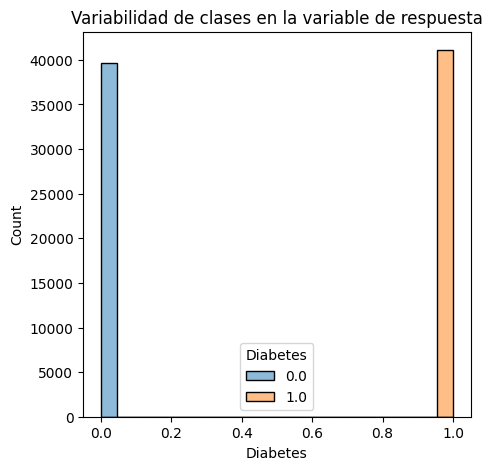

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(data=train_data, x = 'Diabetes', hue='Diabetes' )
plt.title('Variabilidad de clases en la variable de respuesta')
plt.show()

Como puede apreciarse en la imagen, las clases de la variable de respuesta se encuentran balanceadas dentro del dataset

### Distribución de las características del dataset de entrenamiento

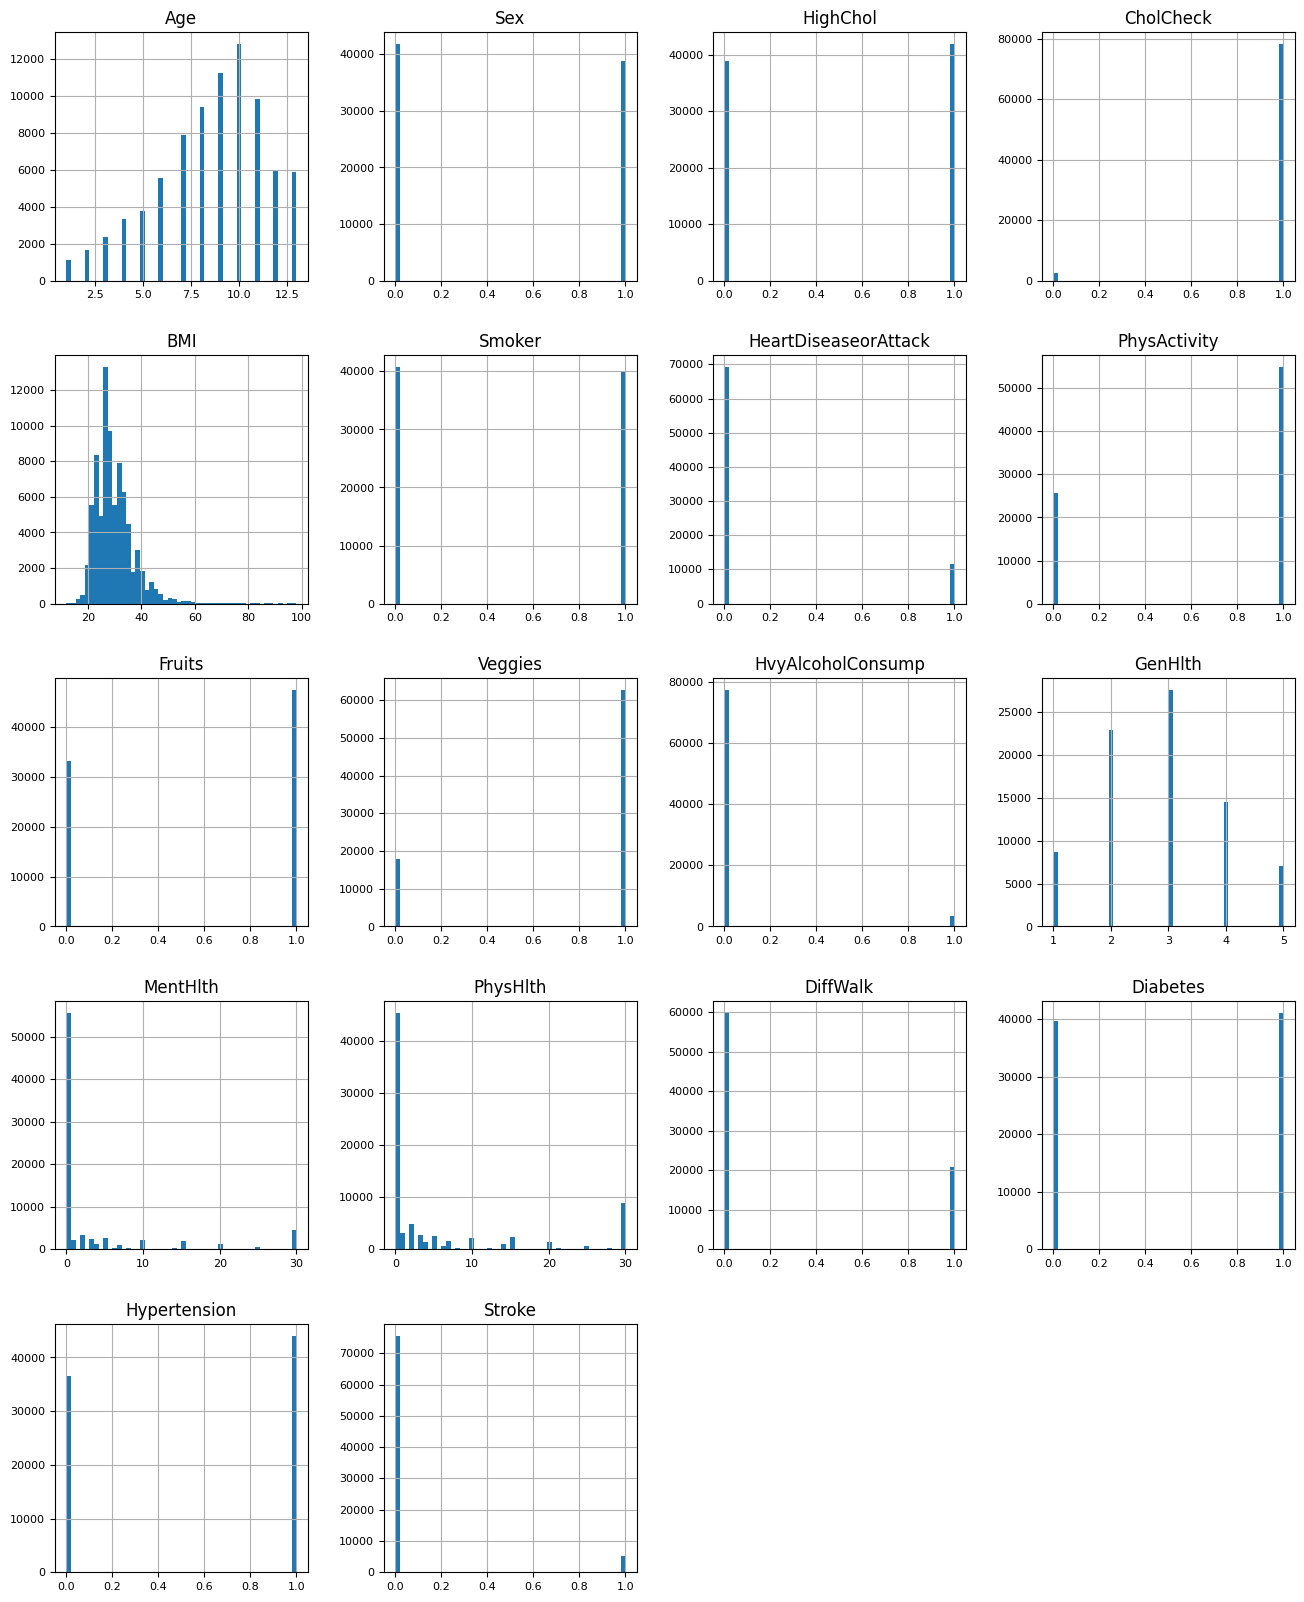

In [ ]:
train_data.hist(figsize=(16,20), bins = 50, xlabelsize=8, ylabelsize=8)
plt.show()

Como puede apreciarse en la anterior imagen, la gran mayoría de las características del dataset son de tipo categóricas, ya que solamente poseen un número limitado de valores que pueden tomar. Por lo tanto, procedemos a hacer una separación de las variables que son numéricas con respecto a las que son categóricas

In [ ]:
numericas = ['Age','BMI','MentHlth','PhysHlth']
categoricas = ['Sex','HighChol','CholCheck','Smoker','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','GenHlth','DiffWalk','Hypertension','Stroke']

In [ ]:
train_data[numericas].head(5)

,Age,BMI,MentHlth,PhysHlth
0,4.0,26.0,5.0,30.0
1,12.0,26.0,0.0,0.0
2,13.0,26.0,0.0,10.0
3,11.0,28.0,0.0,3.0
4,8.0,29.0,0.0,0.0


In [ ]:
train_data[categoricas].head(5)

,Sex,HighChol,CholCheck,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,DiffWalk,Hypertension,Stroke
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,1.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0


De acuerdo con la clasificación dada a las variables, tenemos 12 de tipo categóricas, y solamente 5 de tipo numérica

# Detección de datos atípicos

Inicialmente, graficaremos un diagrama de caja y bigotes para observar la distribución de las variables numéricas dentro de la base de datos

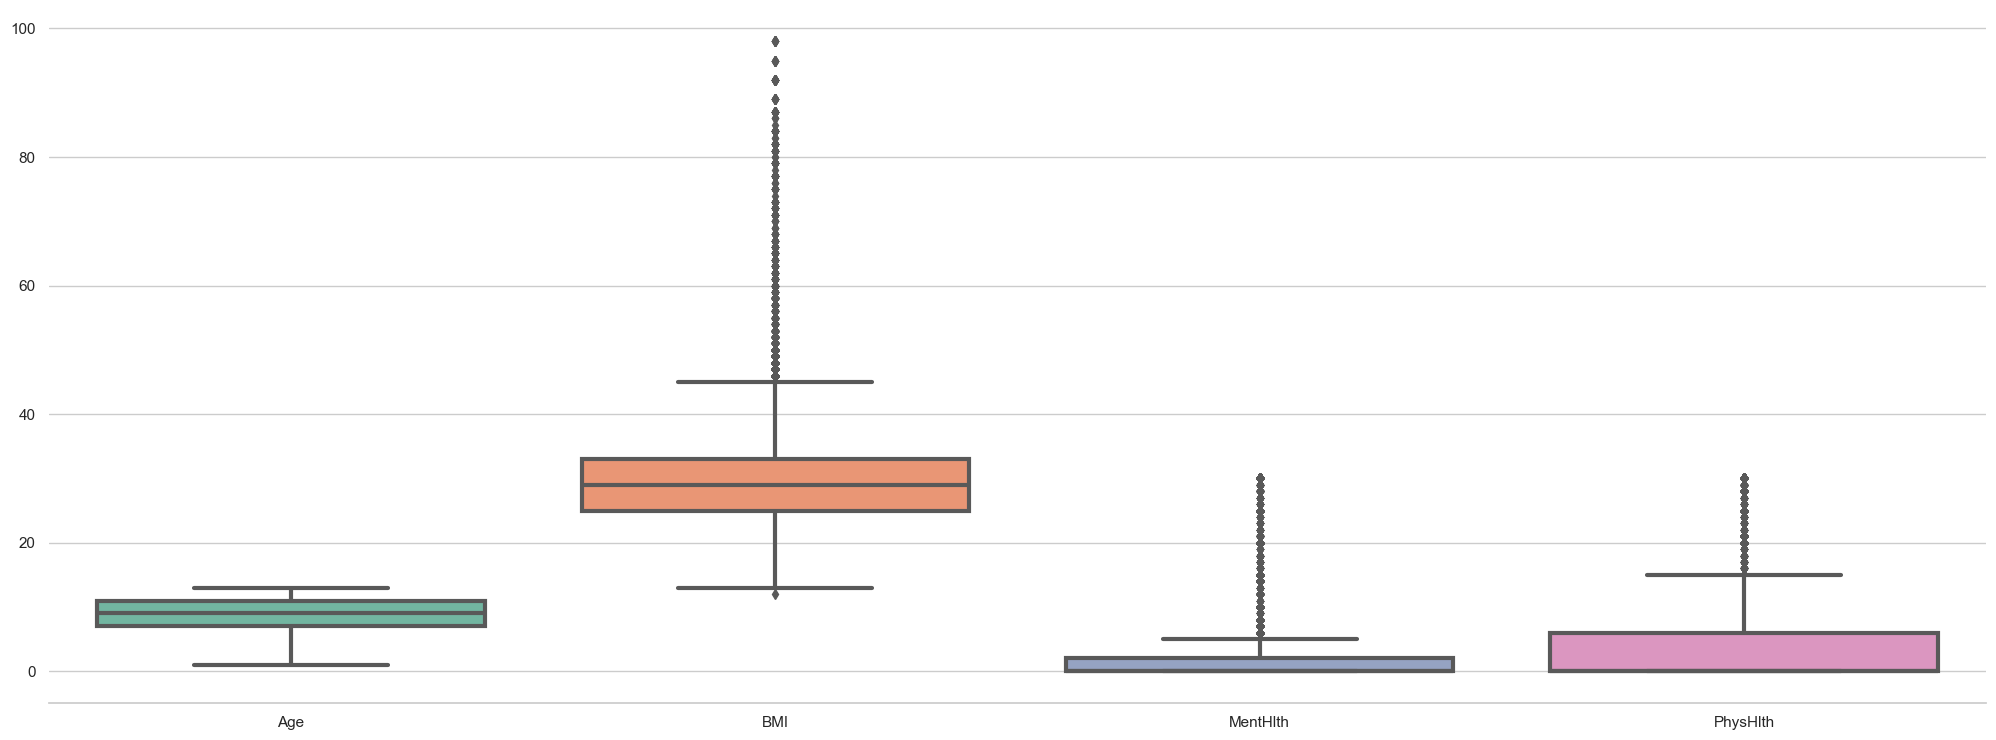

In [ ]:
sns.set(rc={'figure.figsize':(25,9)})
sns.set(style="whitegrid")
sns.boxplot(data = train_data[numericas], linewidth = 3, palette="Set2", fliersize = 5)
sns.despine(left=True)

Se procede a hacer una normalización de los datos para evaluar su influencia en la obtención del gráfico de caja y bigotes

In [ ]:
train_data_Min_Max = MinMaxScaler(copy=True, feature_range=(0, 1))
nombres = train_data.columns
train_data_Datos_Min_Max = train_data_Min_Max.fit_transform(train_data)
train_data_Datos_Min_Max = pd.DataFrame(train_data_Datos_Min_Max, columns = nombres)

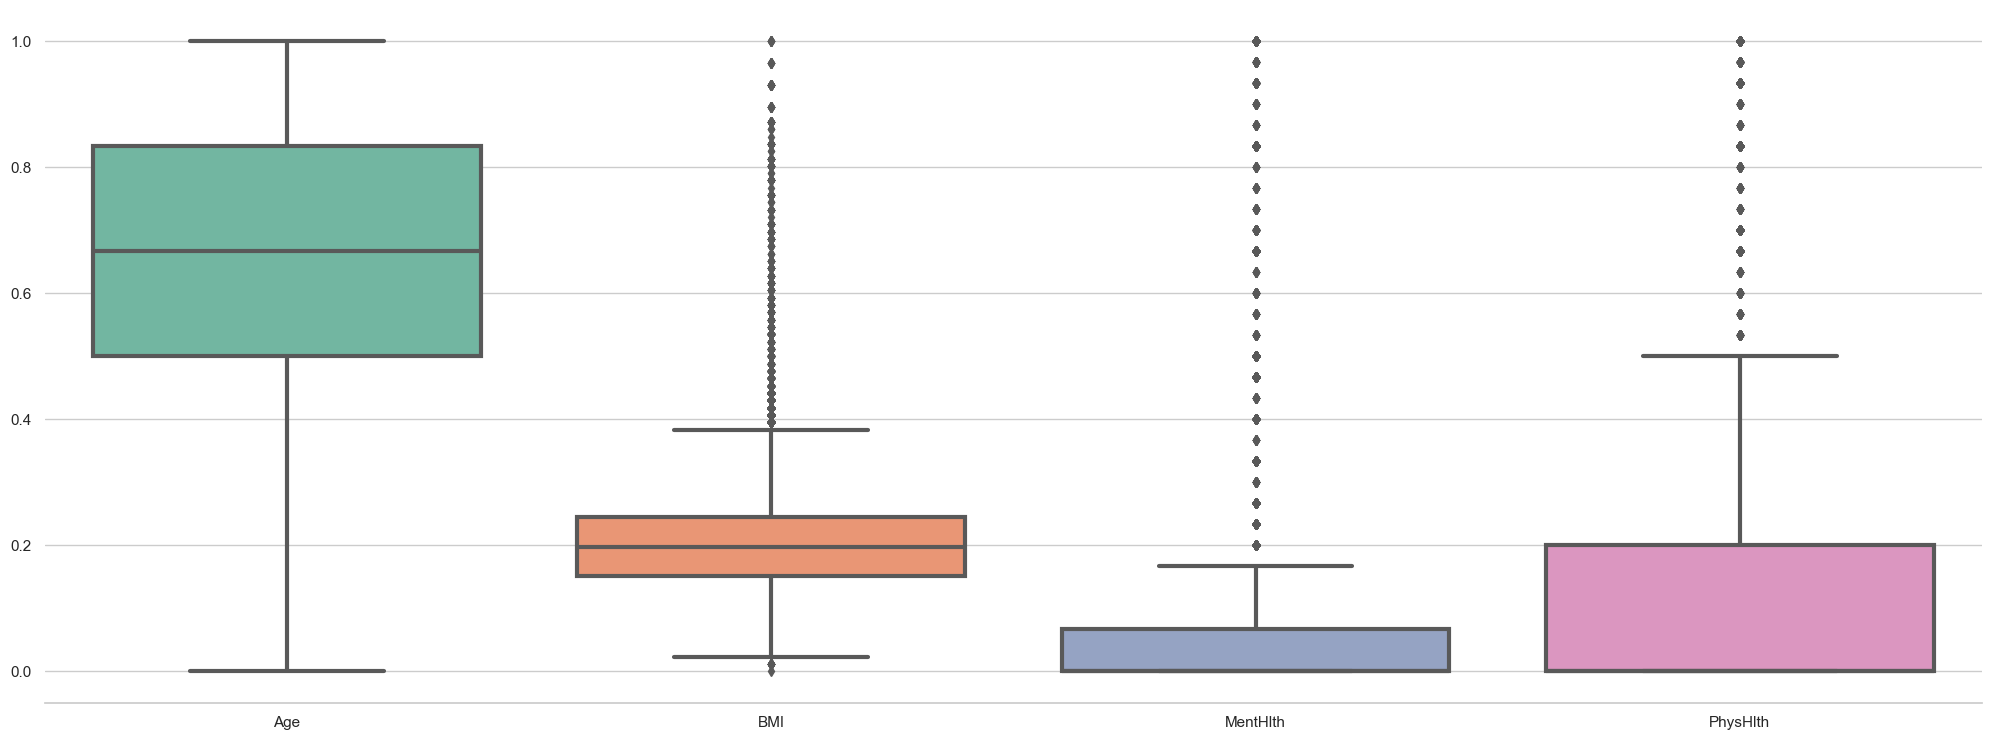

In [ ]:
sns.set(rc={'figure.figsize':(25,9)})
sns.set(style="whitegrid")
sns.boxplot(data = train_data_Datos_Min_Max[numericas], linewidth = 3, palette="Set2", fliersize = 5)
sns.despine(left=True)

Como puede visualizarse en el anterior gráfico de caja y bigotes, las variables *Age* y *GenHlth* no tienen datos atípicos, pero las columnas *BMI*, *MentHlth* y *PhysHlth*, sí poseen datos atípicos por encima del percentil 75%. Por consiguiente, se detectarán y eliminarán los datos atípicos sin sacrificar en la medida de lo posible, la información que puedan ofrecer las variables *BMI*, *MentHlth* y *PhysHlth*.

Se empleará el algoritmo LOF para llevar a cabo la eliminación controlada de datos atípicos. La contaminación que se utilizará será igual al 10%

In [ ]:
LOF = LocalOutlierFactor(n_neighbors = 5, algorithm = 'auto', contamination = 0.1, metric = 'euclidean')

Filtrado = LOF.fit_predict(train_data_Datos_Min_Max)

NOF = LOF.negative_outlier_factor_
radio_outiler = (NOF.max() - NOF)/(NOF.max() - NOF.min())
ground_truth = np.ones(len(train_data_Datos_Min_Max), dtype = int)
n_errors = (Filtrado != ground_truth).sum()

In [ ]:
print("Detección: ", Filtrado)
print("Factores atípicos negativos: ", NOF)
print("Número de muestras o filas con datos atípicos: ", n_errors)

Detección:  [ 1  1 -1 ... -1  1 -1]
Factores atípicos negativos:  [-1.08632144 -1.00935701 -2.03233323 ... -2.52788853 -1.24975945
 -7.04445329]
Número de muestras o filas con datos atípicos:  8070


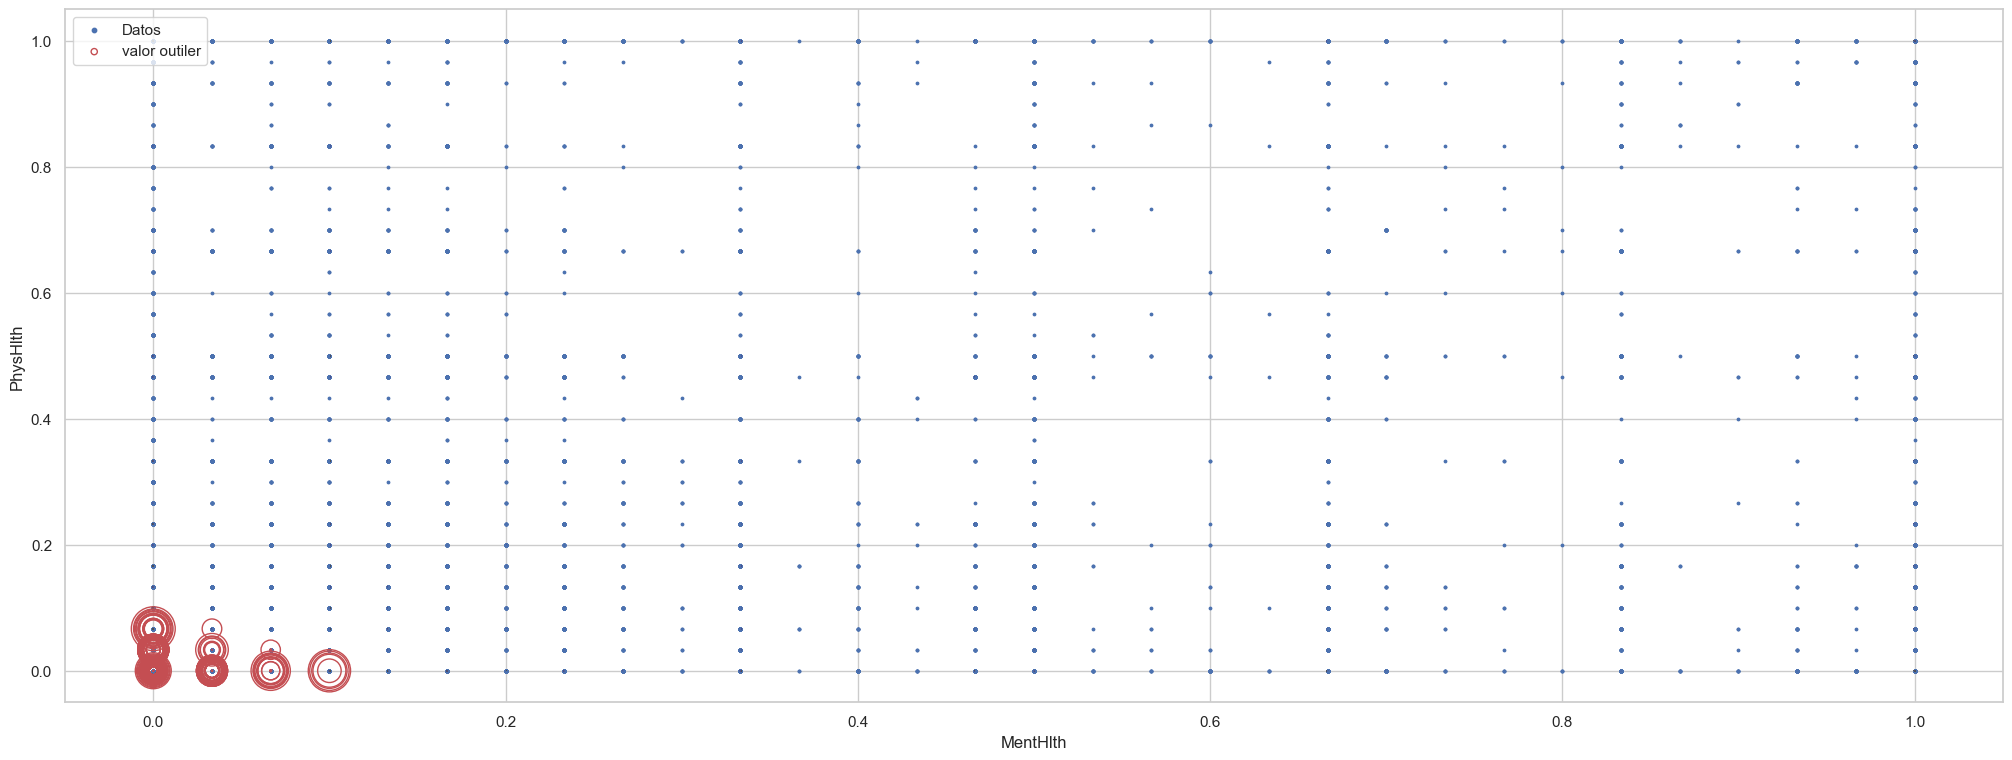

In [ ]:
plt.scatter(train_data_Datos_Min_Max['MentHlth'], train_data_Datos_Min_Max['PhysHlth'], color='b', s=3, label='Datos')
plt.scatter(train_data_Datos_Min_Max['MentHlth'], train_data_Datos_Min_Max['PhysHlth'], s=1000 * radio_outiler, edgecolors='r', facecolors='none', label='valor outiler')
plt.axis('tight')
plt.xlabel('MentHlth')
plt.ylabel('PhysHlth')
legend = plt.legend(loc = 'upper left')
legend.legend_handles[0]._sizes = [10]
legend.legend_handles[1]._sizes = [20]
plt.show()

In [ ]:
pos = np.where(Filtrado == ground_truth)
pos = np.asarray(pos)
pos = np.hstack(pos)
datos_sin_outilers_LOF = train_data_Datos_Min_Max.copy().loc[pos, :]
print("Número de muestras sin outilers:", datos_sin_outilers_LOF.shape[0])
display(datos_sin_outilers_LOF)

Número de muestras sin outilers: 72622


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,0.250000,1.0,0.0,1.0,0.162791,0.0,0.0,1.0,0.0,1.0,0.0,0.50,0.166667,1.000000,0.0,0.0,1.0,0.0
1,0.916667,1.0,1.0,1.0,0.162791,1.0,0.0,0.0,1.0,0.0,0.0,0.50,0.000000,0.000000,0.0,0.0,1.0,1.0
3,0.833333,1.0,1.0,1.0,0.186047,1.0,0.0,1.0,1.0,1.0,0.0,0.50,0.000000,0.100000,0.0,0.0,1.0,0.0
4,0.583333,0.0,0.0,1.0,0.197674,1.0,0.0,1.0,1.0,1.0,0.0,0.25,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,1.0,0.069767,0.0,0.0,1.0,1.0,1.0,0.0,0.25,0.233333,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80684,0.583333,1.0,0.0,1.0,0.325581,0.0,0.0,1.0,1.0,1.0,0.0,0.25,0.000000,0.233333,0.0,0.0,0.0,0.0
80685,0.583333,1.0,0.0,1.0,0.151163,1.0,0.0,1.0,1.0,1.0,0.0,0.50,0.000000,0.000000,0.0,0.0,0.0,0.0
80686,0.500000,1.0,1.0,1.0,0.337209,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.000000,0.166667,1.0,1.0,1.0,0.0
80688,0.750000,1.0,1.0,1.0,0.116279,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.000000,1.000000,1.0,1.0,1.0,0.0


In [ ]:
print('Tamaño de los datos originales: ', train_data_Datos_Min_Max.shape)
print('Tamaño de los datos sin presencia de outliers: ', datos_sin_outilers_LOF.shape)

Tamaño de los datos originales:  (80692, 18)
Tamaño de los datos sin presencia de outliers:  (72622, 18)


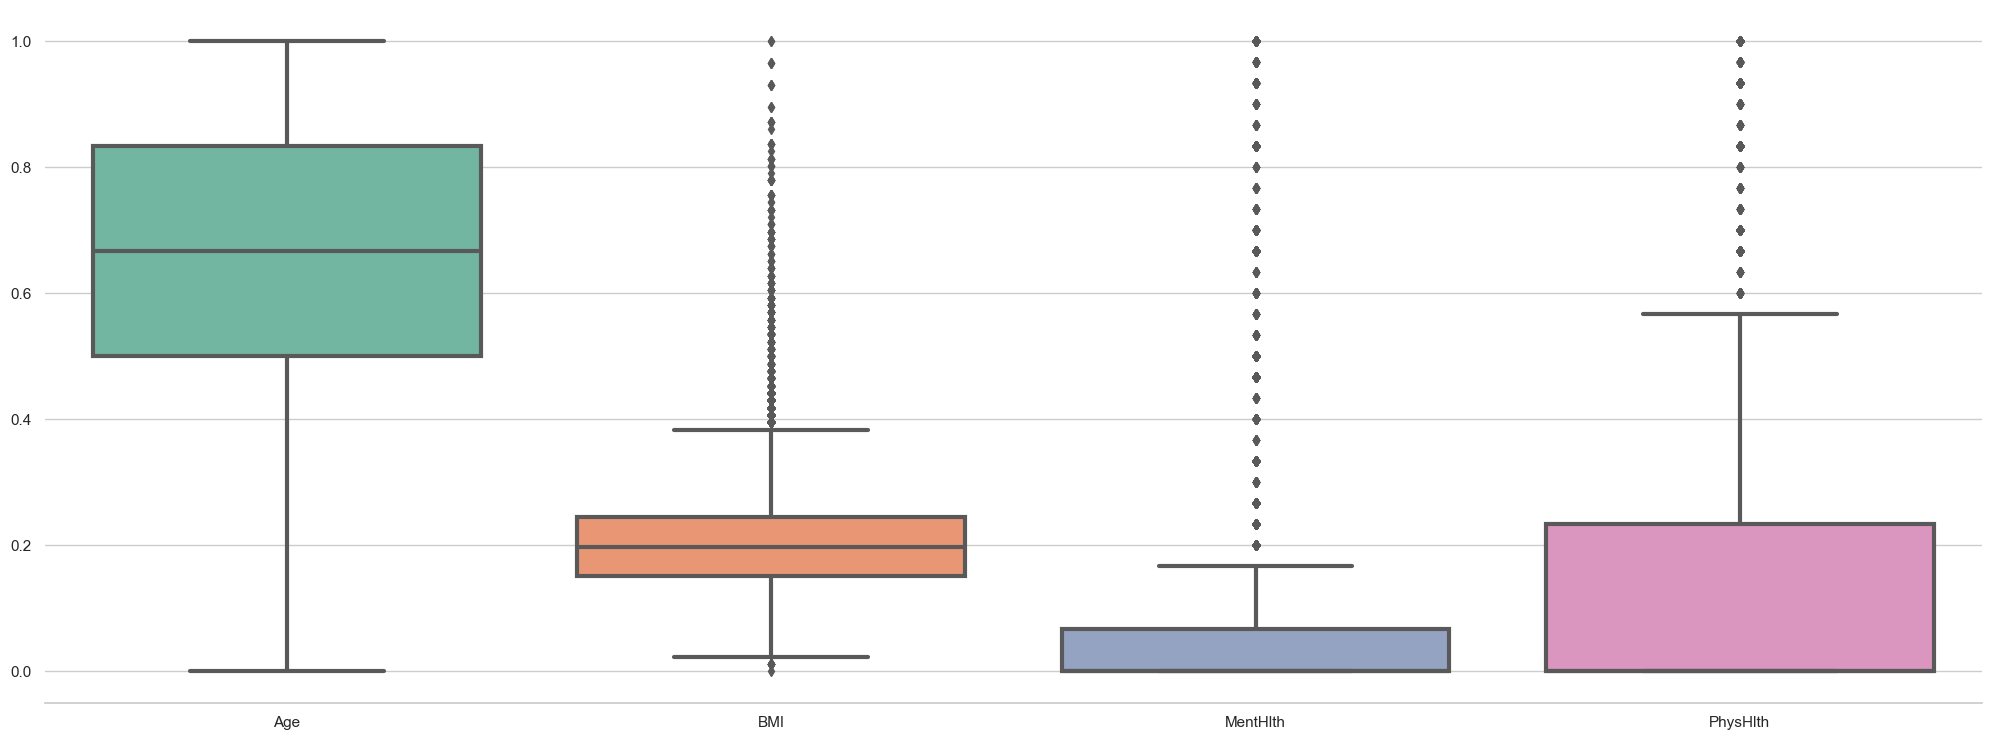

In [ ]:
sns.set(rc={'figure.figsize':(25,9)})
sns.set(style="whitegrid")
sns.boxplot(data = datos_sin_outilers_LOF[numericas], linewidth = 3, palette="Set2", fliersize = 5)
sns.despine(left=True)

In [ ]:
H_1 = entr(train_data_Datos_Min_Max[['BMI','MentHlth','PhysHlth']])
H_2 = entr(datos_sin_outilers_LOF[['BMI','MentHlth','PhysHlth']])

entropia_normalizada_1 = H_1.sum()/train_data_Datos_Min_Max.shape[0]
entropia_normalizada_2 = H_2.sum()/datos_sin_outilers_LOF.shape[0]

entropia_normalizada_1 = pd.DataFrame(entropia_normalizada_1, index = None, columns = ['Entropia Original'])
entropia_normalizada_2 = pd.DataFrame(entropia_normalizada_2, index = None, columns = ['Entropia LOF'])
Comparacion_entropias = pd.concat([entropia_normalizada_1, entropia_normalizada_2], axis = 1)

display(Comparacion_entropias)

,Entropia Original,Entropia LOF
BMI,0.311079,0.312066
MentHlth,0.065087,0.063935
PhysHlth,0.082470,0.081624


Al comparar los resultados del cálculo de la entropía de Shannon con el dataset de las variables numéricas normalizadas con el dataset de las variables numéricas luego de haber aplicado el algoritmo LOF, se concluye que este conservó la cantidad de información original de la base de datos.

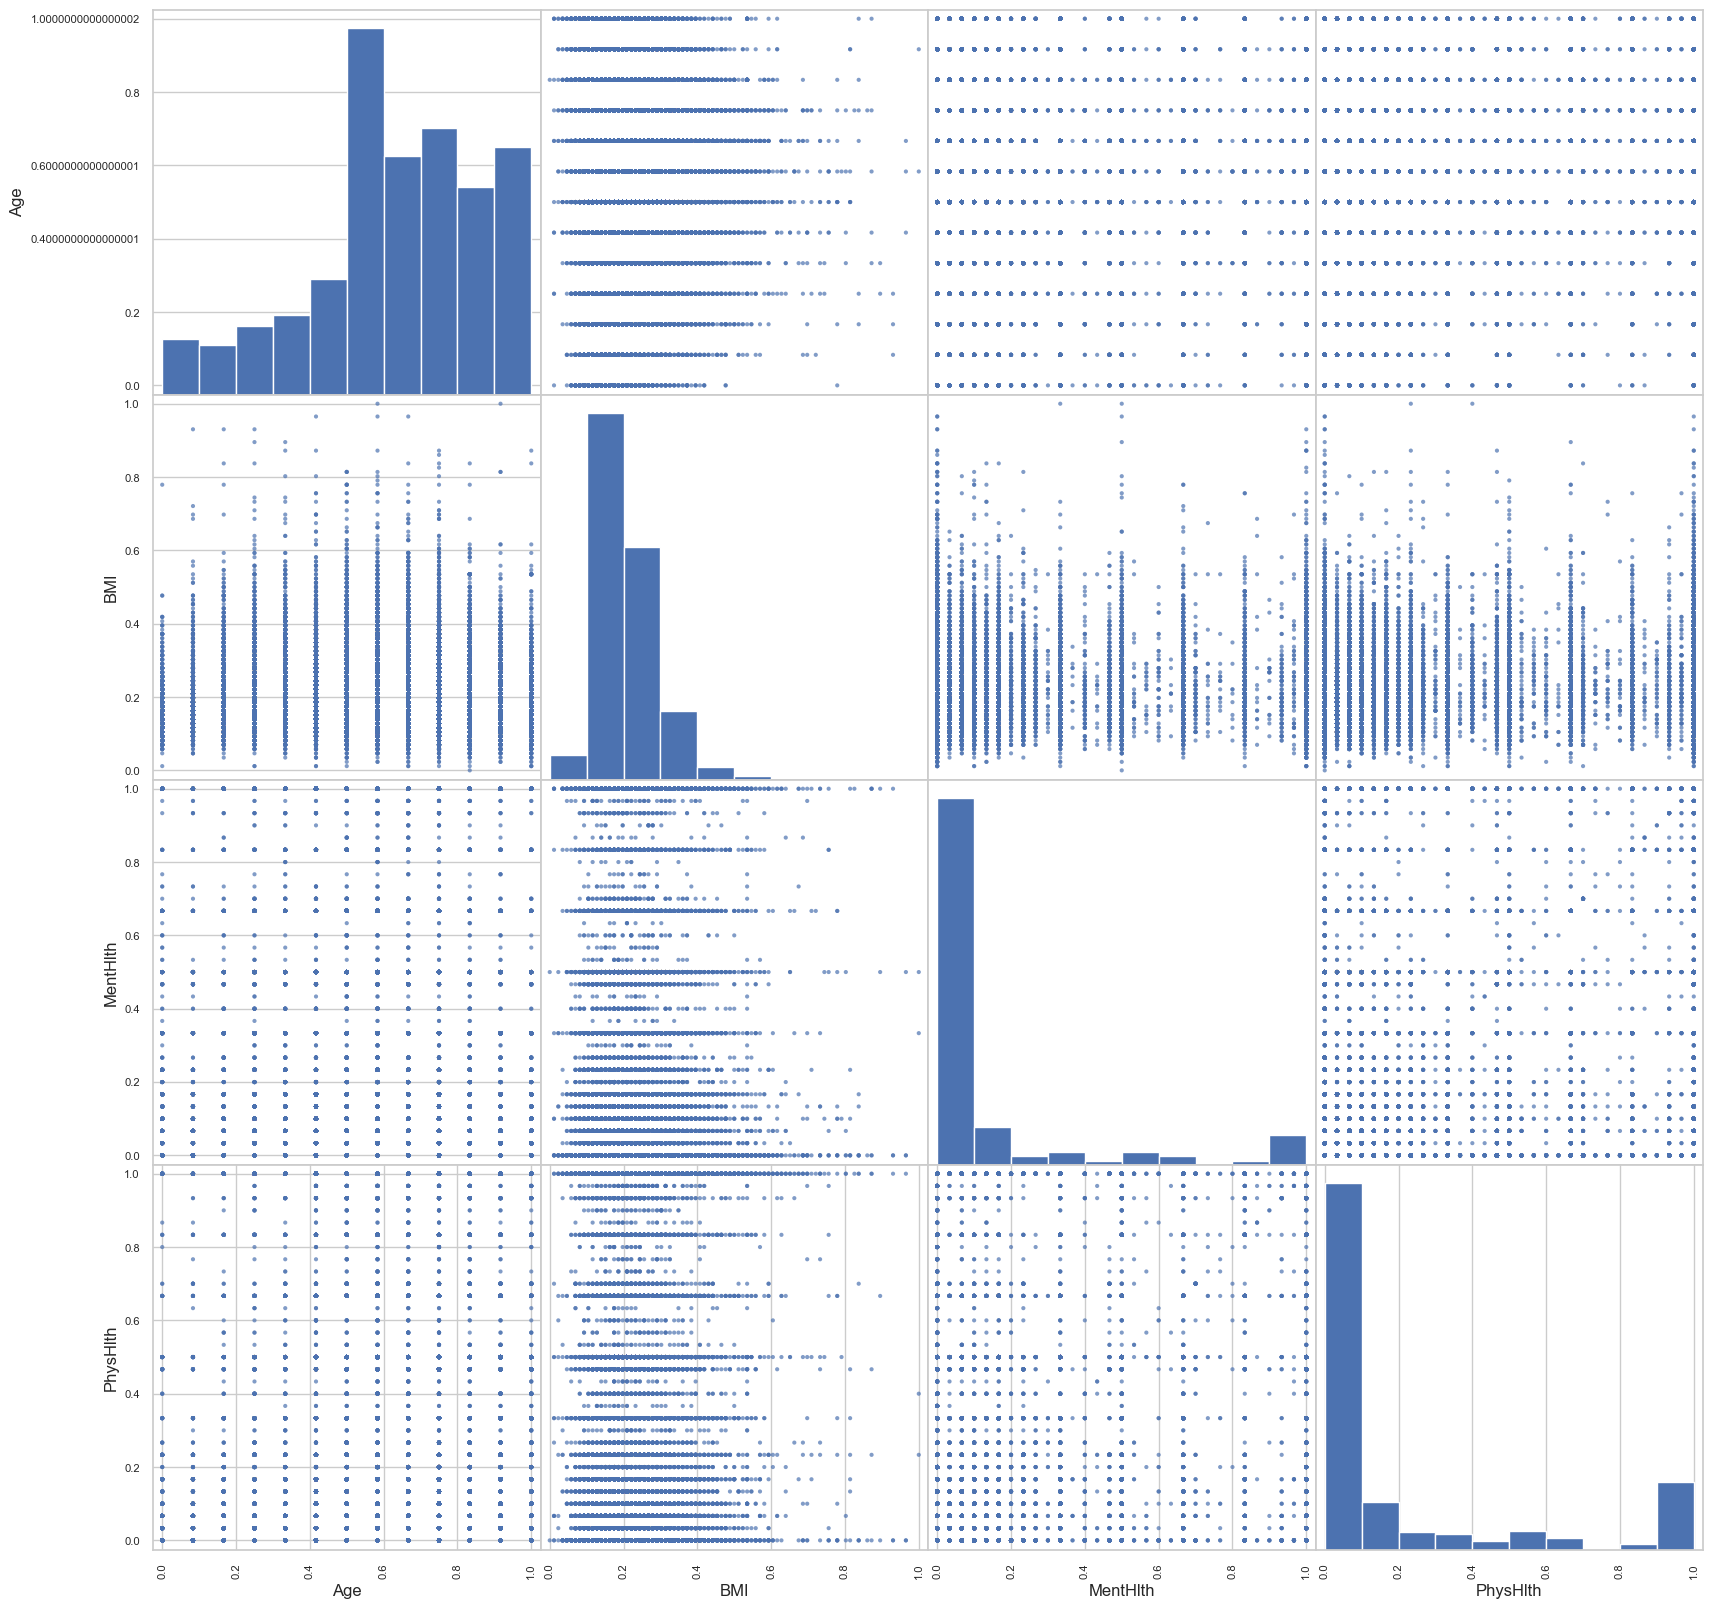

In [ ]:
pd.plotting.scatter_matrix(datos_sin_outilers_LOF[numericas], alpha=0.7, figsize=(20,20))
plt.show()

Se puede observar en el anterior gráfico de dispersión, que no existen correlaciones lineales fuertes entre las variables numéricas del conjunto de datos una vez realizada la eliminación de datos atípicos

Ahora, procedemos a volver a los valores originales del DataSet

In [ ]:
prueba = train_data_Min_Max.inverse_transform(datos_sin_outilers_LOF)
train_data = pd.DataFrame(prueba, columns=train_data.columns)

Procedemos a graficar una matriz de correlación para evaluar cuál es la interacción que existe entre cada par de variables que componen el dataset

In [ ]:
df_training_corr = train_data.copy().drop('Diabetes', axis=1)
df_training_corr.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Hypertension,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0
2,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,0.0
3,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0


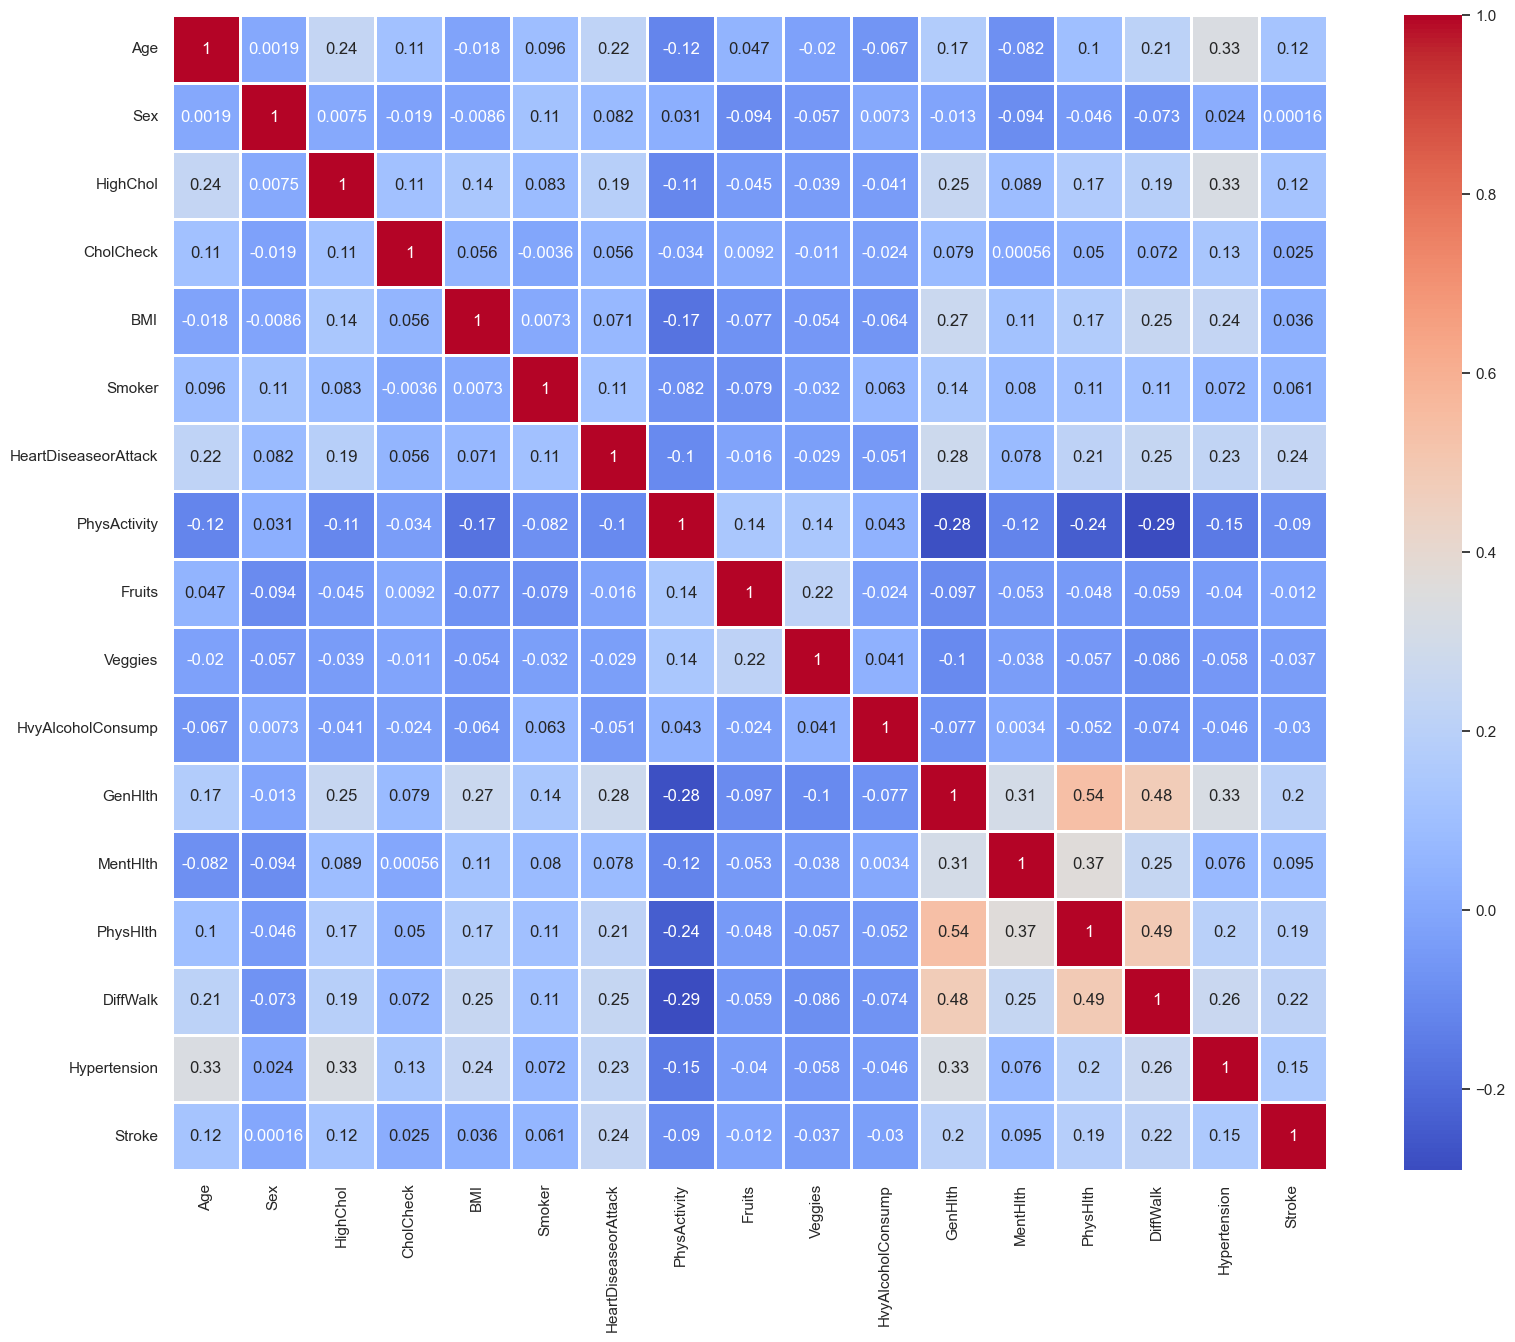

In [ ]:
plt.figure(figsize=(20,15))
fig = sns.heatmap(df_training_corr.corr(), annot=True, linewidths=0.9, square=True, cmap='coolwarm')
plt.show()

Como puede apreciarse, no existen correlaciones fuertes entre variables, ya que, excluyendo la diagonal principal, no hay valores dentro de la matriz que sean cercanos a la unidad.

# Partición de los conjuntos de datos en entrenamiento y pruebas

In [ ]:
X = train_data_Datos_Min_Max.copy().drop('Diabetes', axis = 1)
Y = train_data_Datos_Min_Max['Diabetes'].copy().values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.8,random_state = 42,shuffle = True)

In [ ]:
X_LOF = datos_sin_outilers_LOF.copy().drop('Diabetes', axis = 1)
Y_LOF = datos_sin_outilers_LOF['Diabetes'].copy().values

In [ ]:
X_train_LOF, X_test_LOF, Y_train_LOF, Y_test_LOF = train_test_split(X_LOF,Y_LOF, train_size = 0.8,random_state = 42,shuffle = True)

# Aplicación del modelo de regresión logística

## Sin eliminación de datos atípicos

In [ ]:
%%time
np.random.seed(4)

# Creacion del modelo
modelo = LogisticRegression(random_state=0, n_jobs=-1)

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Definición de parámetros
parameters = {'penalty':['l1','l2','elasticnet'],'solver':['lbfgs','liblinear','newton-cg','sag','saga','newton-cholesky'],'C':[0.01,0.1,1,10,100]}

# Creacion de gridSearch con los múltiples parámetros
clf1 = GridSearchCV(estimator=modelo
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1'
                    ,n_jobs=-1)


clf1.fit(X_train, Y_train)

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pa

CPU times: total: 3.38 s
Wall time: 35.5 s


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga', 'newton-cholesky']},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results = pd.DataFrame(clf1.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar = show_results.columns[(~show_results.columns.str.contains('split'))]
show_results[mostrar].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
22,1.715201,0.096250,0.037508,0.007651,0.1,l1,saga,0.748858,0.004571,1,0.770626,0.007445,1,0.757494,0.005102,1
45,2.064391,0.194486,0.031499,0.003564,1,l2,sag,0.748796,0.004350,2,0.770474,0.007069,2,0.757414,0.004853,2


## Con eliminación de datos atípicos a través del algoritmo LOF

In [ ]:
%%time
np.random.seed(4)

# Creacion del modelo
modelo_LOF = LogisticRegression(random_state=0, n_jobs=-1)

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Definición de parámetros
parameters = {'penalty':['l1','l2','elasticnet'],'solver':['lbfgs','liblinear','newton-cg','sag','saga','newton-cholesky'],'C':[0.01,0.1,1,10,100]}

# Creacion de gridSearch con los múltiples parámetros
clf1_LOF = GridSearchCV(estimator=modelo_LOF
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1'
                    ,n_jobs=-1)


clf1_LOF.fit(X_train_LOF, Y_train_LOF)

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pa

CPU times: total: 3.67 s
Wall time: 34.7 s


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga', 'newton-cholesky']},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results_LOF = pd.DataFrame(clf1_LOF.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar_LOF = show_results_LOF.columns[(~show_results_LOF.columns.str.contains('split'))]
show_results_LOF[mostrar_LOF].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
19,6.034504,1.270419,0.036852,0.008958,0.1,l1,liblinear,0.751932,0.002398,1,0.785693,0.005702,1,0.767592,0.002823,1
43,1.106613,0.026619,0.047773,0.004484,1,l2,liblinear,0.751898,0.002680,2,0.785561,0.005946,2,0.767537,0.003071,2


# Aplicación del modelo KNN

## Sin eliminación de datos atípicos

Utilizaremos la heurística que establece que para tener una aproximación del número de vecinos más cercanos a emplear, se debe calcular la raíz cuadrada de las observaciones dentro del conjunto de datos

In [ ]:
k_heuristica = np.sqrt(X_train.shape[0])
k_heuristica

254.07282420597446

In [ ]:
%%time
np.random.seed(4)


# Creacion del modelo
knn = KNeighborsClassifier(n_jobs=-1)

#Número de vecinos a evaluar
k=[21,93,171,255]

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Definición de parámetros
parameters = {'n_neighbors':k, 'metric':['euclidean','manhattan','chebyshev','cosine']}

# Creacion de gridSearch con los múltiples parámetros
clf1 = GridSearchCV(estimator=knn
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1')


clf1.fit(X_train, Y_train)

CPU times: total: 34min 51s
Wall time: 11min 54s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'cosine'],
                         'n_neighbors': [21, 93, 171, 255]},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results_knn = pd.DataFrame(clf1.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar = show_results_knn.columns[(~show_results_knn.columns.str.contains('split'))]
show_results_knn[mostrar].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
5,0.019229,0.003973,1.530197,0.033900,manhattan,93,0.738277,0.004471,1,0.781217,0.008428,6,0.752380,0.005156,1
15,0.016129,0.000704,26.534123,5.000877,cosine,255,0.731229,0.005662,12,0.802155,0.009104,1,0.752357,0.005976,2


## Con eliminación de datos atípicos a través del algoritmo LOF

In [ ]:
%%time
np.random.seed(4)


# Creacion del modelo
knn_LOF = KNeighborsClassifier(n_jobs=-1)

#Número de vecinos a evaluar
k=[21,93,171,255]

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Definición de parámetros
parameters = {'n_neighbors':k, 'metric':['euclidean','manhattan','chebyshev','cosine']}

# Creacion de gridSearch con los múltiples parámetros
clf1_LOF = GridSearchCV(estimator=knn_LOF
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1')


clf1_LOF.fit(X_train_LOF, Y_train_LOF)

CPU times: total: 32min 44s
Wall time: 12min 28s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'cosine'],
                         'n_neighbors': [21, 93, 171, 255]},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results_knn_LOF = pd.DataFrame(clf1_LOF.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar_LOF = show_results_knn_LOF.columns[(~show_results_knn_LOF.columns.str.contains('split'))]
show_results_knn_LOF[mostrar_LOF].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
4,0.011588,0.006225,1.343145,0.044608,manhattan,21,0.739625,0.002832,1,0.795959,0.004701,7,0.761214,0.002976,1
13,0.026574,0.016331,29.320105,3.564760,cosine,93,0.734823,0.003521,9,0.810253,0.009675,4,0.761107,0.004468,2


# Aplicación del modelo de Naive Bayes con la modificación de Bernoulli

## Sin eliminación de datos atípicos

In [ ]:
%%time
np.random.seed(4)


# Creacion del modelo
modelo = BernoulliNB()

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Definición de parámetros
parameters = {'binarize':[0,0.35,0.5,0.75], 'alpha':[0,0.25,0.5,0.75,1],'force_alpha':[True,False]}

# Creacion de gridSearch con los múltiples parámetros
clf1 = GridSearchCV(estimator=modelo
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1'
                    ,n_jobs = -1)

clf1.fit(X_train, Y_train)

CPU times: total: 1.23 s
Wall time: 13.5 s


GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0, 0.25, 0.5, 0.75, 1],
                         'binarize': [0, 0.35, 0.5, 0.75],
                         'force_alpha': [True, False]},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results_BernoulliNB = pd.DataFrame(clf1.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar = show_results_BernoulliNB.columns[(~show_results_BernoulliNB.columns.str.contains('split'))]
show_results_BernoulliNB[mostrar].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_binarize,param_force_alpha,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
2,0.104146,0.006685,0.036579,0.006698,0,0.35,True,0.729075,0.004045,1,0.712955,0.009185,11,0.728162,0.005473,1
3,0.106247,0.011693,0.056245,0.021193,0,0.35,False,0.729075,0.004045,1,0.712955,0.009185,11,0.728162,0.005473,1


## Con eliminación de datos atípicos a través del algoritmo LOF

In [ ]:
%%time
np.random.seed(4)


# Creacion del modelo
modelo_LOF = BernoulliNB()

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Definición de parámetros
parameters = {'binarize':[0,0.35,0.5,0.75], 'alpha':[0,0.25,0.5,0.75,1],'force_alpha':[True,False]}

# Creacion de gridSearch con los múltiples parámetros
clf1_LOF = GridSearchCV(estimator=modelo_LOF
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1'
                    ,n_jobs=-1)


clf1_LOF.fit(X_train_LOF, Y_train_LOF)

CPU times: total: 938 ms
Wall time: 6.02 s


GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0, 0.25, 0.5, 0.75, 1],
                         'binarize': [0, 0.35, 0.5, 0.75],
                         'force_alpha': [True, False]},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results_BernoulliNB_LOF = pd.DataFrame(clf1_LOF.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar_LOF = show_results_BernoulliNB_LOF.columns[(~show_results_BernoulliNB_LOF.columns.str.contains('split'))]
show_results_BernoulliNB_LOF[mostrar_LOF].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_binarize,param_force_alpha,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
19,0.195630,0.093381,0.075237,0.066959,0.5,0.35,False,0.728643,0.003699,1,0.719341,0.006353,11,0.734348,0.004266,1
27,0.203442,0.071949,0.092125,0.025789,0.75,0.35,False,0.728643,0.003699,1,0.719341,0.006353,11,0.734348,0.004266,1


# Aplicación del modelo Random Forest

## Sin eliminación de datos atípicos

In [ ]:
%%time
np.random.seed(4)


# Creacion del modelo
modelo = RandomForestClassifier(random_state=0,class_weight='balanced', n_jobs=-1)

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Definición de parámetros

parameters = {'n_estimators':[100,500,1000]
              ,'max_depth':[1,3,5]
              ,'criterion':['gini', 'entropy', 'log_loss']
              }
# Creacion de gridSearch con los múltiples parámetros
clf1 = GridSearchCV(estimator=modelo
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1'
                    ,n_jobs = -1)


clf1.fit(X_train, Y_train)

CPU times: total: 17.8 s
Wall time: 4min 49s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [100, 500, 1000]},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results_RandomForestClassifier = pd.DataFrame(clf1.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar = show_results_RandomForestClassifier.columns[(~show_results_RandomForestClassifier.columns.str.contains('split'))]
show_results_RandomForestClassifier[mostrar].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
7,21.489964,1.466630,4.890975,1.874344,gini,5,500,0.743312,0.003315,1,0.767431,0.00589,1,0.752692,0.003780,1
26,60.921655,4.245027,4.478602,3.049928,log_loss,5,1000,0.743126,0.002913,3,0.767065,0.00557,4,0.752469,0.003429,2


## Con eliminación de datos atípicos a través del algoritmo LOF

In [ ]:
%%time
np.random.seed(4)


# Creacion del modelo
modelo_LOF = RandomForestClassifier(random_state=0,class_weight='balanced', n_jobs=-1)

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Definición de parámetros

parameters = {'n_estimators':[100,500,1000]
              ,'max_depth':[1,3,5]
              ,'criterion':['gini', 'entropy', 'log_loss']
              }
# Creacion de gridSearch con los múltiples parámetros
clf1_LOF = GridSearchCV(estimator=modelo_LOF
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1'
                    ,n_jobs=-1)


clf1_LOF.fit(X_train_LOF, Y_train_LOF)

CPU times: total: 6.03 s
Wall time: 3min 44s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [100, 500, 1000]},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results_RandomForestClassifier_LOF = pd.DataFrame(clf1_LOF.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar_LOF = show_results_RandomForestClassifier_LOF.columns[(~show_results_RandomForestClassifier_LOF.columns.str.contains('split'))]
show_results_RandomForestClassifier_LOF[mostrar_LOF].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
8,33.868165,1.493777,4.391269,3.530212,gini,5,1000,0.745994,0.004492,1,0.769682,0.006703,3,0.759605,0.004734,1
26,21.840722,2.091869,1.003966,0.426848,log_loss,5,1000,0.745890,0.004733,2,0.769881,0.007103,1,0.759576,0.004995,2


# Aplicación del modelo Support Vector Classifier

## Sin eliminación de datos atípicos

In [ ]:
%%time
np.random.seed(4)


# Creacion del modelo
modelo = SVC(random_state=0)

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Definición de para

parameters = {'kernel':['linear','poly','rbf','sigmoid']
              #'probability' :[True,False]
              ,'C':[0.01,0.1,1,10],
              'gamma':['scale', 'auto']
              #'decision_function_shape':['ovo', 'ovr']
              }
# Creacion de gridSearch con los múltiples parámetros
clf1 = GridSearchCV(estimator=modelo
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1'
                    ,n_jobs=-1)


clf1.fit(X_train, Y_train)

CPU times: total: 42.9 s
Wall time: 1h 58min 45s


GridSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results_SVC = pd.DataFrame(clf1.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar = show_results_SVC.columns[(~show_results_SVC.columns.str.contains('split'))]
show_results_SVC[mostrar].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
22,456.857714,22.652847,93.783673,0.828268,1,auto,rbf,0.746503,0.004661,7,0.810463,0.008682,1,0.764953,0.005193,1
28,482.163457,12.034692,26.943802,1.809194,10,auto,linear,0.748083,0.005314,1,0.787973,0.007832,7,0.761001,0.005602,2


## Con eliminación de datos atípicos a través del algoritmo LOF

In [ ]:
%%time
np.random.seed(4)


# Creacion del modelo
modelo_LOF = SVC(random_state=0)

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Definición de para

parameters = {'kernel':['linear','poly','rbf','sigmoid']
              #'probability' :[True,False]
              ,'C':[0.01,0.1,1,10],
              'gamma':['scale', 'auto']
              #'decision_function_shape':['ovo', 'ovr']
              }
# Creacion de gridSearch con los múltiples parámetros
clf1_LOF = GridSearchCV(estimator=modelo_LOF
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1'
                    ,n_jobs=-1)


clf1_LOF.fit(X_train_LOF, Y_train_LOF)

CPU times: total: 29.7 s
Wall time: 1h 32min 31s


GridSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results_SVC_LOF = pd.DataFrame(clf1_LOF.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar_LOF = show_results_SVC_LOF.columns[(~show_results_SVC_LOF.columns.str.contains('split'))]
show_results_SVC_LOF[mostrar_LOF].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
22,382.019815,17.003436,62.814266,2.934012,1,auto,rbf,0.750176,0.003497,8,0.823853,0.005773,1,0.774717,0.003607,1
30,278.896729,14.403071,50.449759,0.817863,10,auto,rbf,0.751261,0.003321,5,0.819727,0.005364,3,0.774603,0.003291,2


# Aplicación del modelo XGBoost


## Sin eliminación de datos atípicos

In [ ]:
%%time
np.random.seed(4)


# Creacion del modelo
modelo = xgb.XGBClassifier(random_state = 0, n_jobs=-1)

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Definición de parámetros

parameters = {'learning_rate':[0.03,0.06,0.1,0.3]
              ,'n_estimators':[100, 500, 1000]
              ,'max_depth':[1,3,5]
              }
# Creacion de gridSearch con los múltiples parámetros
clf1 = GridSearchCV(estimator=modelo
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1'
                    ,n_jobs=-1)


clf1.fit(X_train, Y_train)

CPU times: total: 12.8 s
Wall time: 4min 5s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.03, 0.06, 0.1, 0.3],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [100, 500, 1000]},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results_XGBoostClassifier = pd.DataFrame(clf1.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar = show_results_XGBoostClassifier.columns[(~show_results_XGBoostClassifier.columns.str.contains('split'))]
show_results_XGBoostClassifier[mostrar].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
22,13.366864,0.348471,0.099252,0.015516,0.1,3,500,0.752405,0.006302,3,0.791199,0.007023,3,0.764879,0.006133,1
13,13.339560,0.298323,0.099701,0.010473,0.06,3,500,0.752436,0.006069,2,0.791108,0.007084,4,0.764879,0.006004,2


## Con eliminación de datos atípicos a través del algoritmo LOF

In [ ]:
%%time
np.random.seed(4)


# Creacion del modelo
modelo_LOF = xgb.XGBClassifier(random_state = 0, n_jobs=-1)

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Definición de parámetros

parameters = {'learning_rate':[0.03,0.06,0.1,0.3]
              ,'n_estimators':[100, 500, 1000]
              ,'max_depth':[1,3,5]
              }
# Creacion de gridSearch con los múltiples parámetros
clf1_LOF = GridSearchCV(estimator=modelo_LOF
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1'
                    ,n_jobs=-1)


clf1_LOF.fit(X_train_LOF, Y_train_LOF)

CPU times: total: 6.8 s
Wall time: 3min 38s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.03, 0.06, 0.1, 0.3],
                         'max_depth': [1, 3, 5],
                         'n_estimators': [100, 500, 1000]},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results_XGBoostClassifier_LOF = pd.DataFrame(clf1_LOF.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar_LOF = show_results_XGBoostClassifier_LOF.columns[(~show_results_XGBoostClassifier_LOF.columns.str.contains('split'))]
show_results_XGBoostClassifier_LOF[mostrar_LOF].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
15,4.380982,0.062856,0.049918,0.000446,0.06,5,100,0.757199,0.002353,6,0.808900,0.004761,2,0.776494,0.002651,1
7,20.448775,0.220744,0.124985,0.014671,0.03,5,500,0.757285,0.002507,4,0.807744,0.004068,3,0.776309,0.002594,2


# Aplicación del modelo Adaboost

## Sin eliminación de datos atípicos

In [ ]:
%%time
np.random.seed(4)


# Creacion del modelo
modelo = AdaBoostClassifier(random_state = 0)

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Definición de parámetros

parameters = {'learning_rate':[0.03,0.06,0.1,0.3]
              ,'n_estimators':[100, 500, 1000]
              , 'algorithm': ['SAMME', 'SAMME.R']
              #,'max_depth':[1,3,5]
              }
# Creacion de gridSearch con los múltiples parámetros
clf1 = GridSearchCV(estimator=modelo
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1'
                    ,n_jobs=-1)


clf1.fit(X_train, Y_train)

CPU times: total: 15.6 s
Wall time: 6min 45s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.03, 0.06, 0.1, 0.3],
                         'n_estimators': [100, 500, 1000]},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results_AdaBoostClassifier = pd.DataFrame(clf1.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar = show_results_AdaBoostClassifier.columns[(~show_results_AdaBoostClassifier.columns.str.contains('split'))]
show_results_AdaBoostClassifier[mostrar].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_learning_rate,param_n_estimators,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
14,70.195933,0.315521,4.059587,0.099529,SAMME.R,0.03,1000,0.751042,0.005514,1,0.776743,0.008660,11,0.760533,0.00606,1
17,69.982545,0.380839,4.105290,0.075168,SAMME.R,0.06,1000,0.751026,0.004393,3,0.776652,0.006839,12,0.760508,0.00481,2


## Con eliminación de datos atípicos a través del algoritmo LOF

In [ ]:
%%time
np.random.seed(4)


# Creacion del modelo
modelo_LOF = AdaBoostClassifier(random_state = 0)

# definicion de la variable con el número de pliegues
CV = 5

# valor de evaluación (scoring) del modelo
scoring = ['accuracy','recall','f1']

# Definición de parámetros

parameters = {'learning_rate':[0.03,0.06,0.1,0.3]
              ,'n_estimators':[100, 500, 1000]
              , 'algorithm': ['SAMME', 'SAMME.R']
              #,'max_depth':[1,3,5]
              }
# Creacion de gridSearch con los múltiples parámetros
clf1_LOF = GridSearchCV(estimator=modelo_LOF
                    , param_grid = parameters
                    , cv=CV
                    , scoring=scoring
                    , return_train_score=False
                    ,refit='f1'
                    ,n_jobs=-1)


clf1_LOF.fit(X_train_LOF, Y_train_LOF)

CPU times: total: 6.2 s
Wall time: 5min 40s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.03, 0.06, 0.1, 0.3],
                         'n_estimators': [100, 500, 1000]},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [ ]:
show_results_AdaBoostClassifier_LOF = pd.DataFrame(clf1_LOF.cv_results_).sort_values('rank_test_f1',ascending=True)
mostrar_LOF = show_results_AdaBoostClassifier_LOF.columns[(~show_results_AdaBoostClassifier_LOF.columns.str.contains('split'))]
show_results_AdaBoostClassifier_LOF[mostrar_LOF].drop('params',axis=1).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_learning_rate,param_n_estimators,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,mean_test_recall,std_test_recall,rank_test_recall,mean_test_f1,std_test_f1,rank_test_f1
16,30.412323,0.160091,1.907795,0.047542,SAMME.R,0.06,500,0.754204,0.003889,1,0.794110,0.006662,11,0.771114,0.004154,1
14,61.606243,0.509012,3.622844,0.075835,SAMME.R,0.03,1000,0.754152,0.003915,2,0.793978,0.006815,12,0.771047,0.004205,2


# Implementación de cross-validation

## Sin eliminación de datos atípicos

In [ ]:
%%time
#Creación y entrenamiento de los modelos
modelLR = LogisticRegression(random_state=0,C=0.1,penalty='l1',solver='saga', n_jobs=-1).fit(X_train, Y_train)
modelknn = KNeighborsClassifier(n_neighbors = 93,metric='manhattan', n_jobs=-1).fit(X_train, Y_train)
modelBNB = BernoulliNB(alpha=0,force_alpha=True,binarize=0.35).fit(X_train, Y_train)
modelRanForest = RandomForestClassifier(n_estimators=500, max_depth=5,criterion='gini', random_state=0, n_jobs=-1).fit(X_train, Y_train)
modelSVC = SVC(random_state=0,kernel='rbf',C=1,gamma='auto',probability=True).fit(X_train, Y_train)
modelXGBC = xgb.XGBClassifier(random_state = 0, learning_rate = 0.1, n_estimators =500, max_depth = 3,n_jobs = -1).fit(X_train, Y_train)
modelADBC = AdaBoostClassifier(random_state = 0, learning_rate=0.03, n_estimators=1000, algorithm='SAMME.R').fit(X_train, Y_train)

CPU times: total: 6min 40s
Wall time: 16min 19s


In [ ]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida
#Se realizó una partición adicional del 20% de test para usar el 10% en cross validation y un 10% posterior para prueba en "producción".

X_test_cv, X_test_final, y_test_cv, y_test_final = train_test_split(
                                        X_test,
                                        Y_test,
                                        train_size   = 0.5,
                                        random_state = 123,
                                        shuffle      = True
                                    )
X_test_cv_full = pd.concat([X_train,X_test_cv],axis=0)
y_test_cv_full = pd.concat([pd.DataFrame(Y_train),pd.DataFrame(y_test_cv)],axis=0)

In [ ]:
%%time
# definicion de la variable con el número de pliegues
CV = 10

# Lista con las métricas de scoring
scoring = ['accuracy', 'recall', 'f1']

# Lista de modelos que se ejecutarán (con base en los ya definidos)
models = [
    ('modelLR', modelLR),
    ('modelknn', modelknn),
    ('modelBNB', modelBNB),
    ('modelRanForest', modelRanForest),
    ('modelSVC', modelSVC),
    ('modelXGBC', modelXGBC),
    ('modelADBC', modelADBC),
]

# Crear un DataFrame vacío para almacenar los resultados
cv_df = pd.DataFrame()

# Para cada modelo definido en la lista models aplicar validacion cruzada y almacenarlo en el dataframe cv_df
for model_name, model in models:
    scores = cross_validate(model, X_test_cv_full, y_test_cv_full, cv=CV, scoring=scoring, return_train_score=False,n_jobs=-1)
    model_scores = pd.DataFrame(scores)
    model_scores['model_name'] = model_name
    cv_df = pd.concat([cv_df, model_scores], ignore_index=True)

# Reordenar las columnas devueltas por cross_validate
column_order = ['model_name', 'test_accuracy', 'test_recall', 'test_f1']
cv_df = cv_df.reindex(columns=column_order)

cv_df

CPU times: total: 469 ms
Wall time: 56min 32s


,model_name,test_accuracy,test_recall,test_f1
0,modelLR,0.752031,0.770523,0.759514
1,modelLR,0.746523,0.776212,0.756835
2,modelLR,0.753374,0.784011,0.763627
3,modelLR,0.750207,0.768835,0.757746
4,modelLR,0.735748,0.748780,0.742243
...,...,...,...,...
65,modelADBC,0.755026,0.776423,0.763084
66,modelADBC,0.751170,0.784882,0.762268
67,modelADBC,0.742771,0.764021,0.751199
68,modelADBC,0.751584,0.775129,0.760298


In [ ]:
cv_df.sort_values('test_f1',ascending=False)

,model_name,test_accuracy,test_recall,test_f1
42,modelSVC,0.753787,0.827371,0.773499
46,modelSVC,0.753236,0.819290,0.771429
50,modelXGBC,0.759190,0.795448,0.770503
52,modelXGBC,0.757367,0.798916,0.769914
41,modelSVC,0.748038,0.825522,0.769056
...,...,...,...,...
22,modelBNB,0.727623,0.717073,0.727923
27,modelBNB,0.727486,0.703603,0.724104
28,modelBNB,0.723768,0.707938,0.722622
29,modelBNB,0.721977,0.705771,0.720708


0.82: LogisticRegression(C=0.1, n_jobs=-1, penalty='l1', random_state=0,
                   solver='saga')
0.80: KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=93)
0.80: BernoulliNB(alpha=0, binarize=0.35, force_alpha=True)
0.81: RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=-1, random_state=0)
0.82: SVC(C=1, gamma='auto', probability=True, random_state=0)
0.82: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monot

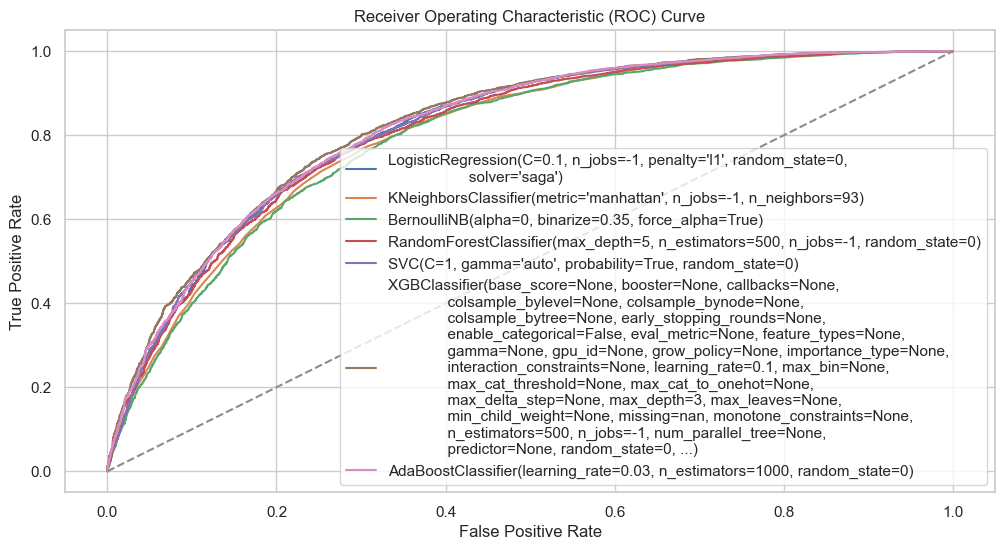

In [ ]:
# Una vez obtenido el resultado, se grafica la curva roc para el 10% restante.
# Crear figura de tamaño 12x6
fig = plt.figure(figsize=(12, 6))

# Lista de modelos a evaluar
Modelos = [modelLR,modelknn,modelBNB,modelRanForest,modelSVC,modelXGBC,modelADBC]

# Iterar sobre los modelos
for i in range(len(Modelos)):

    # Obtener probabilidades de predicción del modelo
    probs = Modelos[i].predict_proba(X_test_final)

    # Seleccionar la columna correspondiente a la probabilidad de clase positiva
    probs = probs[:, 1]

    # Calcular el AUC-ROC
    auc = roc_auc_score(y_test_final, probs*(1))

    # Calcular las tasas de FPR y TPR
    fpr, tpr, _ = roc_curve(y_test_final, probs*(1))

    # Graficar la curva ROC del modelo actual
    plt.plot(fpr, tpr, label=Modelos[i])

    # Mostrar el AUC-ROC y el nombre del modelo
    print("{:.2f}: {}".format(auc, Modelos[i]))


# Graficar la línea diagonal punteada (clasificador aleatorio)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')  # Etiqueta del eje x
plt.ylabel('True Positive Rate')  # Etiqueta del eje y
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Título del gráfico
plt.legend()  # Mostrar la leyenda de los modelos
plt.show()  # Mostrar el gráfico

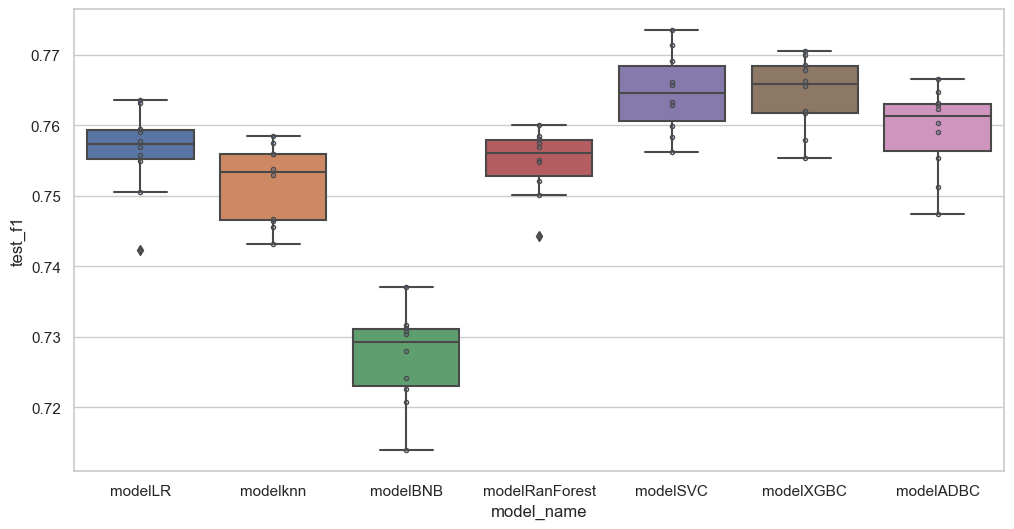

In [ ]:
# Gráfica de f1-score de los modelos

fig = plt.figure(figsize=(12,6))

sns.boxplot(x='model_name', y='test_f1', data=cv_df)
sns.stripplot(x='model_name', y='test_f1', data=cv_df,
              size=1, jitter=False, edgecolor="gray", linewidth=3)
plt.show()

In [ ]:
y_SVC = modelSVC.predict(X_test_final)

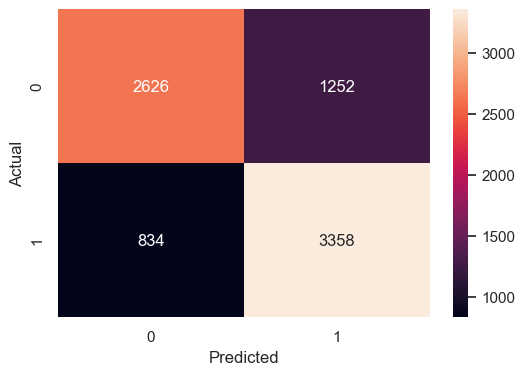

              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72      3878
         1.0       0.73      0.80      0.76      4192

    accuracy                           0.74      8070
   macro avg       0.74      0.74      0.74      8070
weighted avg       0.74      0.74      0.74      8070



In [ ]:
# y_pred = y_ComplNB

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test_final, y_SVC)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test_final, y_SVC))

## Con eliminación de datos atípicos a través del algoritmo LOF

In [ ]:
%%time
#Creación y entrenamiento de los modelos
modelLR_LOF = LogisticRegression(random_state=0,C=0.1,penalty='l1',solver='liblinear', n_jobs=-1).fit(X_train_LOF, Y_train_LOF)
modelknn_LOF = KNeighborsClassifier(n_neighbors = 21,metric='manhattan', n_jobs=-1).fit(X_train_LOF, Y_train_LOF)
modelBNB_LOF = BernoulliNB(alpha=0.5,force_alpha=False,binarize=0.35).fit(X_train_LOF, Y_train_LOF)
modelRanForest_LOF = RandomForestClassifier(n_estimators=1000, max_depth=5,criterion='gini', random_state=0,n_jobs=-1).fit(X_train_LOF, Y_train_LOF)
modelSVC_LOF = SVC(random_state=0,kernel='rbf',C=1,gamma='auto',probability=True).fit(X_train_LOF, Y_train_LOF)
modelXGBC_LOF = xgb.XGBClassifier(random_state = 0, learning_rate = 0.06, n_estimators =100, max_depth = 5, n_jobs = -1).fit(X_train_LOF, Y_train_LOF)
modelADBC_LOF = AdaBoostClassifier(random_state = 0, learning_rate=0.06, n_estimators=500, algorithm='SAMME.R').fit(X_train_LOF, Y_train_LOF)

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


CPU times: total: 4min 57s
Wall time: 12min 21s


In [ ]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida
#Se realizó una partición adicional del 20% de test para usar el 10% en cross validation y un 10% posterior para prueba en "producción".

X_test_cv_LOF, X_test_final_LOF, y_test_cv_LOF, y_test_final_LOF = train_test_split(
                                        X_test_LOF,
                                        Y_test_LOF,
                                        train_size   = 0.5,
                                        random_state = 123,
                                        shuffle      = True
                                    )
X_test_cv_full_LOF = pd.concat([X_train_LOF,X_test_cv_LOF],axis=0)
y_test_cv_full_LOF = pd.concat([pd.DataFrame(Y_train_LOF),pd.DataFrame(y_test_cv_LOF)],axis=0)

In [ ]:
%%time
# definicion de la variable con el número de pliegues
CV = 10

# Lista con las métricas de scoring
scoring = ['accuracy', 'recall', 'f1']

# Lista de modelos que se ejecutarán (con base en los ya definidos)
models = [
    ('modelLR_LOF', modelLR_LOF),
    ('modelknn_LOF', modelknn_LOF),
    ('modelBNB_LOF', modelBNB_LOF),
    ('modelRanForest_LOF', modelRanForest_LOF),
    ('modelSVC_LOF', modelSVC_LOF),
    ('modelXGBC_LOF', modelXGBC_LOF),
    ('modelADBC_LOF', modelADBC_LOF),
]

# Crear un DataFrame vacío para almacenar los resultados
cv_df_LOF = pd.DataFrame()

# Para cada modelo definido en la lista models aplicar validacion cruzada y almacenarlo en el dataframe cv_df
for model_name, model in models:
    scores = cross_validate(model, X_test_cv_full_LOF, y_test_cv_full_LOF, cv=CV, scoring=scoring, return_train_score=False,n_jobs=-1)
    model_scores = pd.DataFrame(scores)
    model_scores['model_name'] = model_name
    cv_df_LOF = pd.concat([cv_df_LOF, model_scores], ignore_index=True)

# Reordenar las columnas devueltas por cross_validate
column_order = ['model_name', 'test_accuracy', 'test_recall', 'test_f1']
cv_df_LOF = cv_df_LOF.reindex(columns=column_order)

cv_df_LOF

CPU times: total: 344 ms
Wall time: 44min 5s


,model_name,test_accuracy,test_recall,test_f1
0,modelLR_LOF,0.750612,0.779472,0.765333
1,modelLR_LOF,0.760710,0.795015,0.776124
2,modelLR_LOF,0.756273,0.794721,0.772850
3,modelLR_LOF,0.752142,0.794721,0.769886
4,modelLR_LOF,0.757497,0.792021,0.773085
...,...,...,...,...
65,modelADBC_LOF,0.746634,0.778821,0.762274
66,modelADBC_LOF,0.750000,0.788501,0.766904
67,modelADBC_LOF,0.747399,0.786448,0.764580
68,modelADBC_LOF,0.750612,0.786448,0.766876


In [ ]:
cv_df_LOF.sort_values('test_f1',ascending=False)

,model_name,test_accuracy,test_recall,test_f1
44,modelSVC_LOF,0.761628,0.834262,0.784985
41,modelSVC_LOF,0.760863,0.834018,0.784444
51,modelXGBC_LOF,0.764535,0.815836,0.783331
54,modelXGBC_LOF,0.762240,0.816075,0.781680
64,modelADBC_LOF,0.764382,0.806395,0.781188
...,...,...,...,...
22,modelBNB_LOF,0.729498,0.724633,0.736513
28,modelBNB_LOF,0.723225,0.714286,0.729151
25,modelBNB_LOF,0.722766,0.707832,0.727026
20,modelBNB_LOF,0.720930,0.709677,0.726291


0.83: LogisticRegression(C=0.1, n_jobs=-1, penalty='l1', random_state=0,
                   solver='liblinear')
0.81: KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=21)
0.81: BernoulliNB(alpha=0.5, binarize=0.35, force_alpha=False)
0.82: RandomForestClassifier(max_depth=5, n_estimators=1000, n_jobs=-1,
                       random_state=0)
0.83: SVC(C=1, gamma='auto', probability=True, random_state=0)
0.83: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_chil

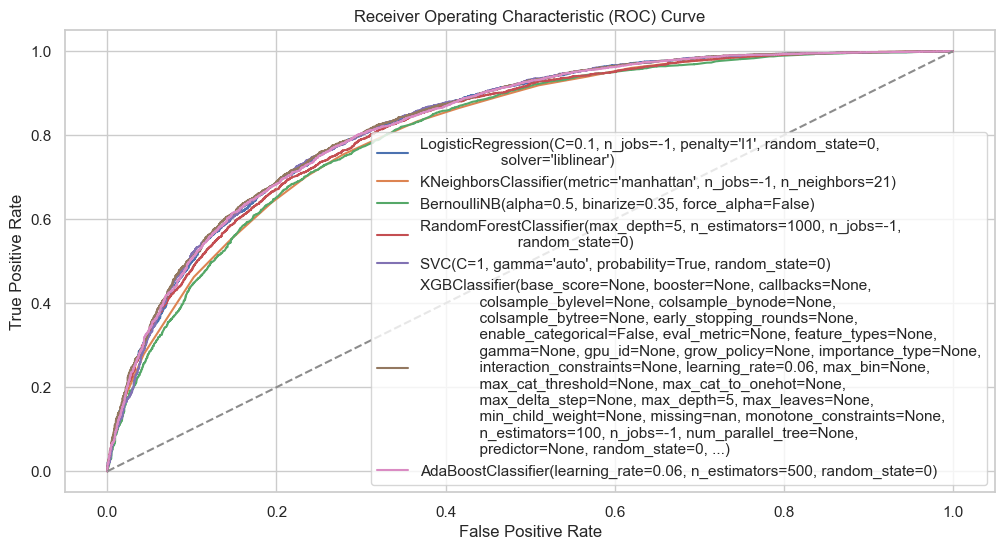

In [ ]:
# Una vez obtenido el resultado, se grafica la curva roc para el 10% restante.
# Crear figura de tamaño 12x6
fig = plt.figure(figsize=(12, 6))

# Lista de modelos a evaluar
Modelos = [modelLR_LOF,modelknn_LOF,modelBNB_LOF,modelRanForest_LOF,modelSVC_LOF,modelXGBC_LOF,modelADBC_LOF]

# Iterar sobre los modelos
for i in range(len(Modelos)):

    # Obtener probabilidades de predicción del modelo
    probs = Modelos[i].predict_proba(X_test_final_LOF)

    # Seleccionar la columna correspondiente a la probabilidad de clase positiva
    probs = probs[:, 1]

    # Calcular el AUC-ROC
    auc = roc_auc_score(y_test_final_LOF, probs*(1))

    # Calcular las tasas de FPR y TPR
    fpr, tpr, _ = roc_curve(y_test_final_LOF, probs*(1))

    # Graficar la curva ROC del modelo actual
    plt.plot(fpr, tpr, label=Modelos[i])

    # Mostrar el AUC-ROC y el nombre del modelo
    print("{:.2f}: {}".format(auc, Modelos[i]))


# Graficar la línea diagonal punteada (clasificador aleatorio)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')  # Etiqueta del eje x
plt.ylabel('True Positive Rate')  # Etiqueta del eje y
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Título del gráfico
plt.legend()  # Mostrar la leyenda de los modelos
plt.show()  # Mostrar el gráfico

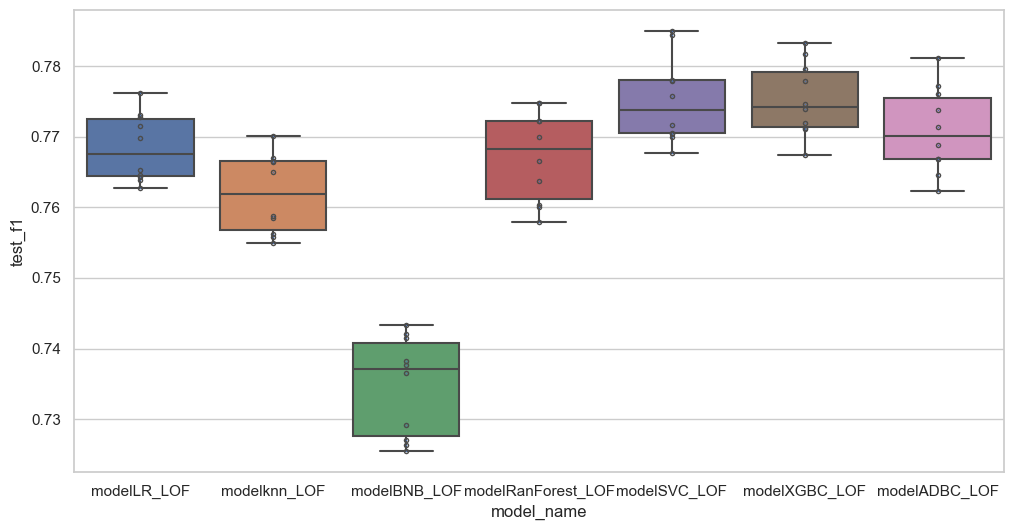

In [ ]:
# Gráfica de f1-score de los modelos

fig = plt.figure(figsize=(12,6))

sns.boxplot(x='model_name', y='test_f1', data=cv_df_LOF)
sns.stripplot(x='model_name', y='test_f1', data=cv_df_LOF,
              size=1, jitter=False, edgecolor="gray", linewidth=3)
plt.show()

In [ ]:
y_SVC_LOF = modelSVC_LOF.predict(X_test_final_LOF)

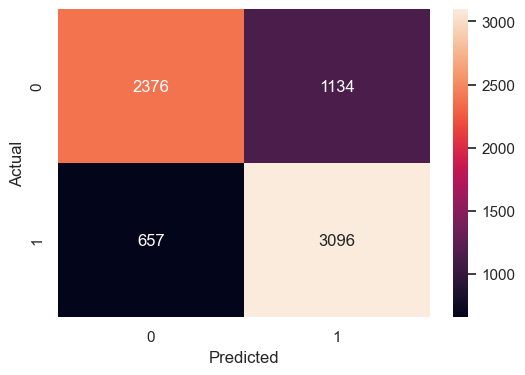

              precision    recall  f1-score   support

         0.0       0.78      0.68      0.73      3510
         1.0       0.73      0.82      0.78      3753

    accuracy                           0.75      7263
   macro avg       0.76      0.75      0.75      7263
weighted avg       0.76      0.75      0.75      7263



In [ ]:
# y_pred = y_ComplNB

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test_final_LOF, y_SVC_LOF)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test_final_LOF, y_SVC_LOF))